# PROJECT OVERVIEW

## PROJECT GOAL:


* **Use President Trump's tweets (NLP and other features) to predict fluctuations in the stock market (using S&P 500 as index).**

    
### DATA USED:

* **All Donald Trump tweets from inaugaration day 2017 to today (for now) - 06/20/19**

    *          Extracted from http://www.trumptwitterarchive.com/
*     **Minute-resolution data for the S&P500 covering the same time period.**

    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
### MAJOR REFERENCES / INSPIRATION / PRIOR WORK IN FIELD:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - [Evernote Summary Notes Link](https://www.evernote.com/l/AAoL1CyhPV1GoIzSgq59GO10x6xfEeVDo5s/)

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)
    - [Evernote Summary](https://www.evernote.com/l/AApvQ8Xh8b9GBLhrD0m8w4H1ih1oVM8wkEw/)


### OUTLINE FOR DATA TO PRODUCE & MODEL FOR FINAL PROJECT:

#### TWITTER DATA:

* [ENGINEER FEATURES] **Extract features from Trump's tweets: perform the NLP analysis to generate the features about his tweets to use in final model**

    * [x] Tweet sentiment score
    * [ ] Tweet frequency per timebin
    * [x] upper-to-lowercase-ratio
    * [x] retweet-count
    * [x] favorite-count
    
* [PREDICTIVE MODEL] **Generate Binary Stock Market Predictions based on Trump's Tweets.**

    * [x] Create a neural network model like the Stanford guys, where my model JUST uses the content of trump's tweets with word embeddings and a binary label (-1, 0,1) for direction of stock market change at a fixed time delta (they did 5 mins, I will do 1 hour) [ See reference #1 - stanford poster]
  



#### STOCK MARKET DATA (S&P 500):

* [ENGINEER FEATURES] **Extract features about the stock data -calculate the technical indices for the S&P 500 discussed in his article.**  [ see reference #2 - blog post ]

    * [x] 7 days moving average 
    * [x]  21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    * (Maybe) FFT / time series decomp for trend lines
    
* [PREDICTIVE MODEL] **Generate stock price predictions based only historical data using....**

    * [x] a SARIMA model[?]
    * [ ] a FB Prophet model[?] 
    * [x] an LSTM neural network like other blog post?  [!!!] [Predicting the Stock Market Using Machine Learning and Deep Learning](https://www.evernote.com/l/AAq1azRmt2dANq_Oye-MBZQr-OU5lA5APl8/)
    
#### FINAL MODEL - FEED ALL ABOVE FEATURES INTO:

- **Plan A: NEURAL NETWORK *REGRESSION* MODEL TO PREDICT *ACTUAL S&P 500 PRICE* AT 1 HOUR-1 DAY FOLLOWING TWEETS**
    - Final Model Target is based more on blog post's construction (ref#2), but takes output of model like ref#1
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-5-capstone-project-online-ds-ft-021119/master/figures/annotated_GAN_for_stock_market.jpeg" width=600>
- ~~PLAN B: NEURAL NETWORK *BINARY CLASSIFICATION*  MODEL TO PREDICT THE *DIRECTION OF CHANGE FOR S&P 500 PRICE* AT 1 HOUR - 1 DAY FOLLOWING TWEETS~~
    - ~~Final Model Target is based on stanford poster's methods/goal. (ref #1)~~    

    





## DATA ANALYSIS DETAILS AND Equations/Code 

### Technical Indicators - Explanation & Equations






1. **7 and 21 day moving averages**
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
2. **MACD(Moving Average Convergence Divergence)**

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
3. **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

4. **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


5. **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $V$ = Latest Price
        - $V_x$ = Closing Price
        - $x$ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```



# LOAD & PROCESS RAW STOCK DATA

In [1]:
## MUST RUN THIS CELL FOR IMPORTS
from bs_ds.imports import *
import functions_combined_BEST as ji

"""NOTE: current processed filename ready for modeling is: processed_datafile"""
processed_datafile = '_stock_df_with_technical_indicators.csv'

## LOAD PROCESSED CSV WITH TECH INDICATORS
def load_processed_stock_data(processed_data_filename = '_stock_df_with_technical_indicators.csv', force_from_raw=False):
    import functions_combined_BEST as ji
    import os
    import pandas as pd
    
    # check if csv file already exists
    current_files = os.listdir()

    # Run all processing on raw data if file not found.
    if (force_from_raw is True) or (processed_data_filename not in current_files):
        
        print(f'File not found. Processing raw data using custom ji functions...')
        print('1) ji.load_raw_stock_data_from_text\n2) ji.get_technical_indicators,dropping na from column "ma21"')

        stock_df = ji.load_raw_stock_data_from_txt(
            filename="IVE_bidask1min.txt", 
            start_index='2016-12-01',
            clean=True, fill_or_drop_null='drop', 
            freq='CBH',verbose=1)

        ## CALCULATE TECHNICAL INDICATORS FOR STOCK MARKET
        stock_df = ji.get_technical_indicators(stock_df, make_price_from='BidClose')

        ## Clean up stock_df 
        # Remove beginning null values for moving averages
        na_idx = stock_df.loc[stock_df['ma21'].isna() == True].index # was 'upper_band'
        stock_df = stock_df.loc[na_idx[-1]+1*na_idx.freq:]


    # load processed_data_filename if found
    elif processed_data_filename in current_files:

        print(f'>> File found. Loading {processed_data_filename}')
        
        stock_df=pd.read_csv(processed_data_filename, index_col=0, parse_dates=True)
        stock_df['date_time_index'] = stock_df.index.to_series()
        stock_df.index.freq=ji.custom_BH_freq()
        
    print(stock_df.index[[0,-1]])
#     display(stock_df.head(3))

    return stock_df        

# LOAD IN FULL STOCK DATASET 
full_df = load_processed_stock_data()

# SELECT DESIRED COLUMNS OF 
stock_df = full_df[[
    'date_time_index','price','ma7','ma21','26ema','12ema','MACD',
    '20sd','upper_band','lower_band','ema','momentum','filled_timebin'
]].copy()

# print(stock_df.index.freq)
display(stock_df.head())

Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


bs_ds  v0.8.4 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules use: from bs_ds.imports import *

>> File found. Loading _stock_df_with_technical_indicators.csv
DatetimeIndex(['2016-12-29 15:30:00', '2019-06-21 15:30:00'], dtype='datetime64[ns]', name='date_time_index', freq=None)


,date_time_index,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,filled_timebin
date_time_index,,,,,,,,,,,,,
2016-12-29 15:30:00,2016-12-29 15:30:00,96.27,96.864898,96.277007,96.573856,96.730494,0.156639,1.002051,98.281110,94.272904,96.263988,89.27,False
2016-12-30 09:30:00,2016-12-30 09:30:00,96.38,96.850204,96.293537,96.571218,96.721997,0.150779,0.980655,98.254848,94.332227,96.341329,89.38,False
2016-12-30 10:30:00,2016-12-30 10:30:00,96.21,96.831633,96.307891,96.566317,96.709593,0.143275,0.959724,98.227340,94.388442,96.253776,89.21,False
2016-12-30 11:30:00,2016-12-30 11:30:00,96.34,96.814286,96.322653,96.563255,96.700645,0.137390,0.938272,98.199196,94.446110,96.311259,89.34,False
2016-12-30 12:30:00,2016-12-30 12:30:00,96.25,96.794694,96.336531,96.559027,96.689742,0.130715,0.912397,98.161325,94.511736,96.270420,89.25,False


In [2]:
# DISPLAY CODE TO BE USED BELOW TO LOAD AND PROCESS STOCK DATA
ji.ihelp(ji.load_raw_stock_data_from_txt, show_help=False,show_code=True)

##### SOURCE CODE:
 ____

```python
def load_raw_stock_data_from_txt(filename='IVE_bidask1min.txt', 
                               folderpath='data/',
                               start_index = '2016-12-31',
                                 clean=True,fill_or_drop_null='drop',fill_method='ffill',
                                 freq='CBH',verbose=2):
    import pandas as pd
    import numpy as np
    from IPython.display import display

    # Load in the text file and set headers
    fullfilename= folderpath+filename
    headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
    stock_df = pd.read_csv(fullfilename, names=headers,parse_dates=True)
    
    # Create datetime index
    date_time_index = (stock_df['Date']+' '+stock_df['Time']).rename('date_time_index')
    stock_df['date_time_index'] = pd.to_datetime(date_time_index)
    stock_df.set_index('date_time_index', inplace=True, drop=False)
    
    # Select only the days after start_index
    stock_df = stock_df[start_index:]
    # print(f'\nRestricting stock_df to index {start_index}-forward')
    
    # Remove 0's from BidClose
    if clean==True:
        print(f"There are {len(stock_df.loc[stock_df['BidClose']==0])} '0' values for 'BidClose'")
        stock_df.loc[stock_df['BidClose']==0] = np.nan
        num_null = stock_df['BidClose'].isna().sum()
        print(f'\tReplaced 0 with np.nan. There are {num_null} null values to address.')
        
        if fill_or_drop_null=='drop':
            print("\tSince fill_or_drop_null=drop, dropping null values from BidClose.")
            stock_df.dropna(subset=['BidClose'],axis=0, inplace=True)

        elif fill_or_drop_null=='fill':
            print(f"\tSince fill_or_drop_null=fill, using fill_method={fill_method} to fill BidClose.")

            stock_df['BidClose'].fillna(method=fill_method, inplace=True)
        
        # if verbose>0:
            # print(f"Number of 0 values:\n{len(stock_df.loc[stock_df['BidClose']==0])}")
            # print(f"Filling 0 values using method = {fill_method}")
    # call set_timeindex_freq to specify proper frequency
    if freq!=None:
        # Set the time index .
        print(f'Setting the timeindex to freq{freq}')
        stock_df = set_timeindex_freq(stock_df, freq=freq, fill_method = fill_method, verbose=verbose)
                  
    # Display feedback
    if verbose>0:
        display(stock_df.head())
    if verbose>1:
        print(stock_df.index[[0,-1]],stock_df.index.freq)

    return stock_df

```
___

In [3]:
# # LOAD DATASET
try:
    stock_df
except NameError: 
    stock_df=None
else:
    print('stock_df exists')
if stock_df is None:
    stock_df = load_processed_stock_data()
    

display(stock_df.head(2))
# Plot the resulting 'price' column
fig = ji.plotly_time_series(stock_df,title='S&P500 Hourly Closing Price',
                     x_col='date_time_index', y_col='price',name='S&P500 Price');

stock_df exists


,date_time_index,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,filled_timebin
date_time_index,,,,,,,,,,,,,
2016-12-29 15:30:00,2016-12-29 15:30:00,96.27,96.864898,96.277007,96.573856,96.730494,0.156639,1.002051,98.281110,94.272904,96.263988,89.27,False
2016-12-30 09:30:00,2016-12-30 09:30:00,96.38,96.850204,96.293537,96.571218,96.721997,0.150779,0.980655,98.254848,94.332227,96.341329,89.38,False


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



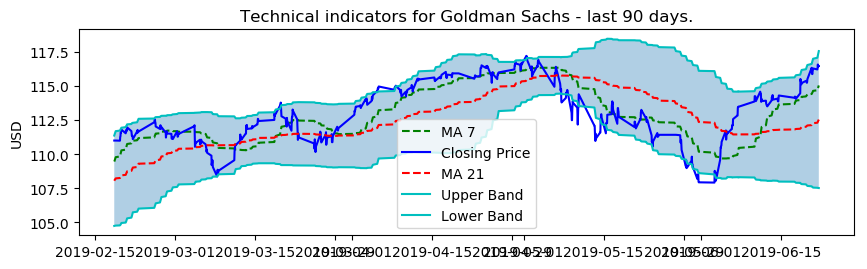

In [4]:
fig2 = ji.plot_technical_indicators(stock_df)

In [5]:
## SAVE FULL CSV WITH TECH INDICATORS
def save_df_to_csv_ask_to_overwrite(stock_df, filename = '_stock_df_with_technical_indicators.csv',):
    import os
    current_files = os.listdir()

    processed_data_filename = filename#'_stock_df_with_technical_indicators.csv'

    # check if csv already exists
    if processed_data_filename not in current_files:

        stock_df.to_csv(processed_data_filename)

    # Ask the user to overwrite existing file
    else:

        print('File already exists.')
        check = input('Overwrite?(y/n):')

        if check.lower() == 'y':
            stock_df.to_csv(processed_data_filename)
            print(f'File {processed_data_filename} was saved.')
    
        else:
            print('No file was saved.')
            
# save_df_to_csv_ask_to_overwrite(stock_df,'stock_df_for_modeling.csv')

## Checking for Stationarity and Trends

In [6]:
# from functions_combined_BEST import stationarity_check, adf_test

Results of Dickey-Fuller Test:
	If p<.05 then timeseries IS stationary.
Test Statistic                   -1.824991
p-value                           0.368127
#Lags Used                       32.000000
Number of Observations Used    4490.000000
Critical Value (1%)              -3.431807
Critical Value (5%)              -2.862184
Critical Value (10%)             -2.567113
dtype: float64


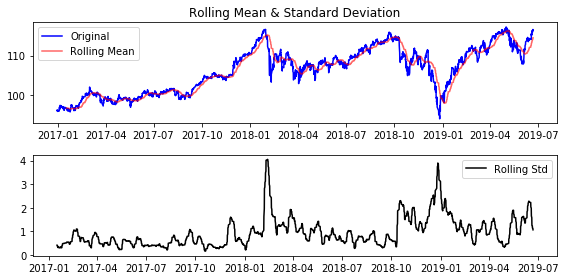

In [7]:
# Check if stationary
ji.stationarity_check(stock_df, col='price',freq=ji.custom_BH_freq())

In [8]:
ji.adf_test(stock_df['price'], title='Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic        -1.824991
p-value                    0.368127
# lags used               32.000000
# observations          4490.000000
critical value (1%)       -3.431807
critical value (5%)       -2.862184
critical value (10%)      -2.567113
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


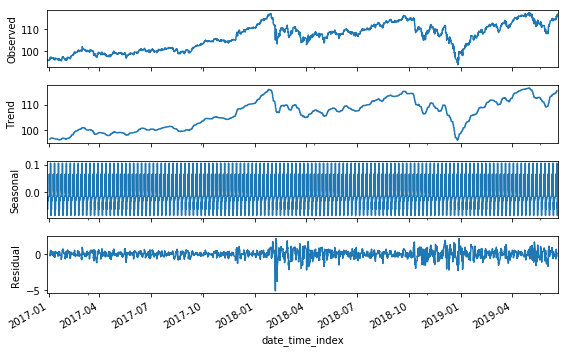

In [9]:
# Adding a seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_df['price'], freq=35)#, freq=custom_BH_freq())

mpl.rcParams['figure.figsize'] = (8,5)
result.plot();

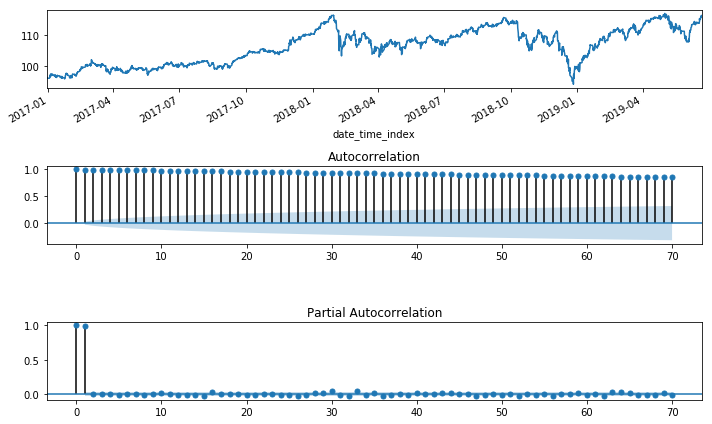

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_df = stock_df['price']

fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,6))

plot_df.plot(ax=ax[0])
# df2.plot(ax=ax[0,1])

num_lags = 70
plot_acf(plot_df,ax=ax[1] , lags=num_lags);
# plot_acf(df2,ax=ax[1,1],lags=40);

plot_pacf(plot_df,ax=ax[2],lags=num_lags);
# plot_pacf(df2,ax=ax[2,1],lags=40);

plt.tight_layout()

# INITIAL MODEL 


## Pyramind ARIMA GridSearch 
#### **Using `pmdarima` to grid search for best ARIMA model type and orders**

- Using `auto_arima` from `pmdarima`

- SARIMA involves multiple sets of hyperparameters:
    - For base model: a set of p,d,q parameters
    - For seasonal model:a set of P,D,Q for the seasonal components.
    - m = the number of time periods to include in the season 
    
- Set start and max values for each parameter
    - i.e. `start_p=0, max_p = 10`
- For seasonal data, setting `m` indicates how many periods should be considered part of the season.


- **Below is from ["Predicitng the Sotck Market Using Machine Learning and Deep Learning."](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/):**
> Below are the steps you should follow for implementing auto ARIMA:
    1. Load the data: This step will be the same. Load the data into your notebook
    2. Preprocessing data: The input should be univariate, hence drop the other columns
    3. Fit Auto ARIMA: Fit the model on the univariate series
    4. Predict values on validation set: Make predictions on the validation set
    5. Calculate RMSE: Check the performance of the model using the predicted values against the actual values

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
skip=True
if skip==False:
    from pmdarima.arima import auto_arima

    model = auto_arima(train_data['price'], start_p=1, start_q=1, D=1, max_p=4,max_q=4,trace=True,seasonal=True,m=35)
    model.summary()

___
**Results of the Auto-Arima searching with training data set:**
- Training Set= all data less the last 90 days:

`Model:		SARIMAX(0, 1, 0)x(1, 0, 1, 35)	`
- So what is this really saying?
    - p,d,q = (0,1,0)
        - AR (p) = 0
        - Difference=1
        - MA order(q)=0 
        
    - P,D,Q,m = (1,0,1,35)
        - Seasonal AR(P) = 1
        - Seasonal Differencing =0
        - Seasonal MA(Q)
        - Steps per season (m) = 35 (set by user)

`statsmodels` version of SARIMA called SARIMAX adds an eXogenous variable to the regression.
- Read this: https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/


- WHEN I SWITCH TO DAILY DATA:
`Model:	SARIMAX(1, 1, 1)x(1, 0, 1, 5)`

#### First try a SARIMA model before SARIMAX

-

In [13]:
skip=True
if skip==False:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    # SARIMAX(0, 1, 0)x(1, 0, 1, 35)	
    # Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 35); AIC=2881.238, BIC=2905.991, Fit time=52.449 seconds
    model = SARIMAX(train_data['price'], order= (1,1,0),seasonal_order=(0,1,1,35), enforce_invertibility=False ) 
    results=model.fit()
    results.summary()

In [14]:
skip=True
if skip==False:
    # evaluate model
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    predictions = results.predict(start=start,end=end).rename('SARIMA Model')
    days_per_period=7

    # Combine preds and true into one df
    df_predictions_sarima = pd.concat([test_data['price'],pd.Series(predictions, index=test_data.index,name='predicted_price')],axis=1)
    df_predictions_sarima.dropna(inplace=True)
    display(df_predictions_sarima.head())

    # calculate rmse
    rmse_sarima = np.sqrt(mean_squared_error(df_predictions_sarima['price'],df_predictions_sarima['predicted_price']))
    print(f"RMSE: {rmse_sarima.round(3)}")

    # Plot results
    plt.plot(train_data['price'].iloc[-120*days_per_period:], label='Training Price')#.plot(label='price - train')
    plt.plot(df_predictions_sarima['price'], label='True Price')
    plt.plot(df_predictions_sarima['predicted_price'], label='Predicted Price')
    plt.ylabel('Stock Price')
    plt.xlabel('Business Day - Hour Resolution')
    plt.title('SARIMA Model')
    plt.legend()
    plt.tight_layout()
    plt.text('2018-10-01',113,f"RMSE: {rmse_sarima.round(3)}", fontdict={'fontsize':10, 'fontweight':'medium'})

# Data Prep/Split Forecasting Stock Market Data
- https://www.evernote.com/l/AApgV1EaL9lEYpujWnwHq62W9QyEKkH4hwA/

def make_scaler_library, transform_cols_from_library, inverse_transform_series<br>
def make_X_y_timeseries_data, make_df_timeseries_bins_by_column<br>
def predict_model_make_results_dict<br>
def save_model

### LOAD DATA
- use prior split `train_data` and `test_data`
- use `make_X_y_timeseries_data` to format data for LSTM

# Train Test Split Data By Date,MinMaxScale
### EDIT HERE TO CHANGE WINDOWS AND DAYS

### CHANGING ORDER OF PROCESSING PER UDEMY COURSE RECOMMENDATION
- Fit the MinMaxScaler on the TRAINING data
    - `train_test_split_by_last_days`
- THEN use that fit scaler to transform the test data
    - `make_scaler_library`,`transform_cols_from_library`

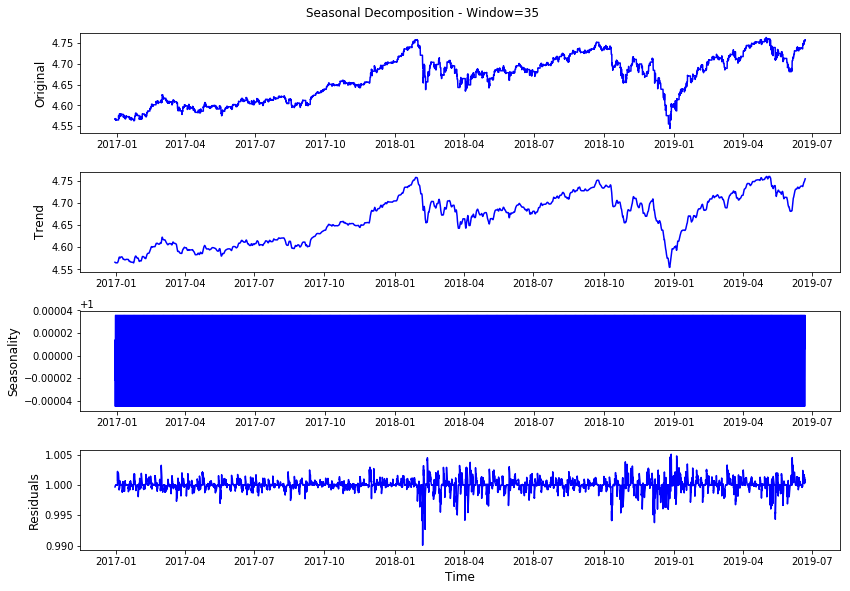

In [15]:
stock_df_decomposed = ji.seasonal_decompose_and_plot(stock_df, col='price', window=35);
# stock_df_decomposed.plot();
# plt.xlim(['2019-01-01','2019-06-01'])

# MODELING

### XGBoost ?

# KERAS

X_window size = 35 -- (5 day(s) * 7 rows/day)

Data split on index:	2019-04-19 15:30:00:
training dates:	2017-11-24 15:30:00 	 2019-04-19 15:30:00.
test dates:	2019-04-19 15:30:00 	 2019-06-21 15:30:00.


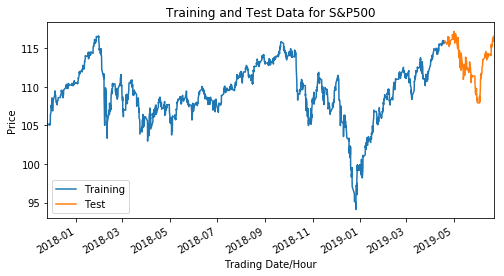

Using TensorFlow backend.


Given the Array: 	(with shape=(1, 35, 1)) 
[0.49466192 0.48798932 0.49065836 0.4866548  0.48487544 0.4866548
 0.48754448 0.48709964 0.49377224 0.50133452 0.50800712 0.52535587
 0.52980427 0.52935943 0.54982206 0.55960854 0.59163701 0.59830961
 0.58941281 0.58629893 0.59252669 0.59030249 0.61076512 0.61343416
 0.62677936 0.64190391 0.64323843 0.63656584 0.62811388 0.63256228
 0.63345196 0.5680605  0.60320285 0.61565836 0.61654804]

Predict this y: 
 [[0.61921708]]


In [16]:
########## SET TRAINING AND TEST SET PARAMETERS: ############
num_test_days=45 # Number of days for test data 
num_train_days=365 # Number of days for training data - 5 days/week * 52 weeks
days_for_x_window = 5 # Number of days to 
############################################################

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(stock_df, ji.custom_BH_freq()) # get the # of rows that == 1 day
x_window = periods_per_day * days_for_x_window 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')
    
###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
df_train, df_test = ji.train_test_split_by_last_days(stock_df, periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
scaler_library , df_train = ji.make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = ji.transform_cols_from_library(df_test,scaler_library)

## Display Preview of Scaled Dataset
# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test') )

## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = x_window # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= 1 # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
train_data = df_train['price'].values.reshape(-1,1)
test_data = df_test['price'].values.reshape(-1,1)
train_data_index =  df_train['price'].index
test_data_index = df_test['price'].index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=train_data, targets=train_data,length=n_input, batch_size=batch_size )
test_generator = TimeseriesGenerator(data=test_data, targets=test_data,length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape}) \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

## KERAS MODEL 1
- **Predicting Price with Keras LSTM - Using ONLY Price**
def predict_model_make_results_dict & def plot_price_vs_preds

In [17]:
def color_cols(df, subset=None, matplotlib_cmap='Greens', rev=False):
    from IPython.display import display
    import seaborn as sns
    
    if rev==True:
        cm = matplotlib_cmap+'_r'
    else:
        cm = matplotlib_cmap
    
    if subset is None:
        return  df.style.background_gradient(cmap=cm)
    else:
        return df.style.background_gradient(cmap=cm,subset=subset)


def arr2series(array,series_index=[],series_name='predictions'):
    """Accepts an array, an index, and a name. If series_index is longer than array:
    the series_index[-len(array):] """
    if len(series_index)==0:
        series_index=list(range(len(array)))
        
    if len(series_index)>len(array):
        new_index= series_index[-len(array):]
        series_index=new_index
        
    series_out = pd.Series(array.ravel(), index=series_index, name=series_name)
    return series_out


def evaluate_regression(y_true, y_pred):
    """Calculates and displays the following evaluation metrics:
    RMSE, R2_score, """
    from sklearn.metrics import r2_score, mean_squared_error
    import numpy as np
    from bs_ds import list2df
    results=[['Metric','Value']]
    
    r2 = r2_score(y_true, y_pred)
    results.append(['R_squared',r2])
    
    RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
    results.append(['Root Mean Squared Error ',RMSE])
    
    U = thiels_U(y_true, y_pred)
    results.append(["Thiel's U", U])
    
    results_df = list2df(results)#, index_col='Metric')
    results_df.set_index('Metric', inplace=True)
    return results_df.round(3)

def thiels_U(ys_true, ys_pred):
    sum_list = []
    num_list=[]
    denom_list=[]
    for t in range(len(ys_true)-1):
        num_exp = (ys_pred[t+1] - ys_true[t+1])/ys_true[t]
        num_list.append([num_exp**2])
        denom_exp = (ys_true[t+1] - ys_true[t])/ys_true[t]
        denom_list.append([denom_exp**2])
    U = np.sqrt( np.sum(num_list) / np.sum(denom_list))
    return U        



def compare_u_for_shifts(true_series,pred_series, shift_list=[-2,-1,0,1,2],plot_all=False,plot_best=True,color_coded=True):
    ## SHIFT THE TRUE VALUES, PLOT, AND CALC THIEL's U
    from bs_ds import list2df
    df = pd.concat([true_series, pred_series],axis=1)
    
    true_colname = 'true'
    pred_colname = 'pred'
    
    df.columns=[true_colname,pred_colname]#.dropna(axis=0,subset=[[true_colname,pred_colname]])
    results=[['# of Bins Shifted','U']]
    
    if plot_all or plot_best:
        plt.figure()

    if plot_all==True:
        df[true_colname].plot(color='black',lw=3,label = 'True Values')
        plt.legend()
        plt.title('Shifted Time Series vs Predicted')
        
        
    for i,shift in enumerate(shift_list):
        if plot_all==True:
            df[pred_colname].shift(shift).plot(label = f'Predicted-Shifted({shift})')

        df_shift=pd.DataFrame()
        df_shift['pred'] = df[pred_colname].shift(shift)
        df_shift['true'] =df[true_colname]
        df_shift.dropna(inplace=True)

        U =thiels_U(df_shift['true'], df_shift['pred'])
        results.append([shift,U])
    
    
    df_results = list2df(results, index_col='# of Bins Shifted')
    
    if plot_best==True:
        shift = df_results.idxmin()[0]
        df[true_colname].plot(label = 'True Values')
        df[pred_colname].shift(shift).plot(ls='--',label = f'Predicted-Shifted({shift})')
        plt.legend()
        plt.title("Best Thiel's U for Shifted Time Series")
        plt.tight_layout()
#         plt.show()

    if color_coded==True:
        dfs_results = color_cols(df_results, rev=True)
        return dfs_results.set_caption("Thiel's U - Shifting Prediction Time bins")
    else:
        return df_results.style.set_caption("Thiel's U - Shifting Prediction Time bins")






def compare_eval_metrics_for_shifts(true_series,pred_series, shift_list=[-2,-1,0,1,2],plot_all=False,plot_best=True):
    ## SHIFT THE TRUE VALUES, PLOT, AND CALC THIEL's U
    from bs_ds import list2df
    df = pd.concat([true_series, pred_series],axis=1)
    
    true_colname = 'true'
    pred_colname = 'pred'
    
    df.columns=[true_colname, pred_colname]#.dropna(axis=0,subset=[[true_colname,pred_colname]])

    results=[['Bins Shifted','Metric','Value']]
    combined_results = pd.DataFrame(columns=results[0])
    
    for shift in shift_list:

        df_shift=pd.DataFrame()
        df_shift[pred_colname] = df[pred_colname].shift(shift)
        df_shift[true_colname] =df[true_colname]
        df_shift.dropna(inplace=True)      
        
        shift_results = evaluate_regression(df_shift[true_colname],df_shift[pred_colname]).reset_index()
        shift_results.insert(0,'Bins Shifted',shift)
        
        combined_results = pd.concat([combined_results,shift_results], axis=0)
    
    combined_results.set_index(['Bins Shifted','Metric'], inplace=True)
    return combined_results

In [18]:
# Instantiating clock timer
import bs_ds as bs
clock = bs.Clock(verbose=0)

# defining loss function to use
def my_rmse(y_true,y_pred):
    """RMSE calculation using keras.backend"""
    from keras import backend as kb
    sq_err = kb.square(y_pred - y_true)
    mse = kb.mean(sq_err,axis=-1)
    rmse =kb.sqrt(mse)
    return rmse

# CREATING CALLBACKS
from keras import callbacks
filepath = 'model1_weights.{epoch:02d}.hdf5'
checkpoint = callbacks.ModelCheckpoint(filepath=filepath, monitor=my_rmse,mode='min',
                                       save_best_only=True, verbose=1)
early_stop = callbacks.EarlyStopping(monitor=my_rmse,mode='min',patience=1,min_delta=.001,verbose=1)
callbacks = [checkpoint,early_stop]


# creating LOG list for forthcoming results
LOG = [['Test #','Defining difference','RunTime','Test_RMSE_keras','Test_RMSE_price','acc','Train_RMSE_keras','Train_RMSE_price']]

from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from keras import optimizers

# Specifying input shape (size of samples, rank of samples?)
input_shape=(n_input, n_features)

# Create model architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape =input_shape))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

# nadam = optimizers.Nadam(lr=0.002,)

model.compile(loss=my_rmse, optimizer=optimizers.Nadam(), metrics=['acc', my_rmse])#optimizer=optimizers.Nadam()
display(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 35, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


None

------------------------------------------------------------------------------------------------------------------------
	FITTING MODEL:
------------------------------------------------------------------------------------------------------------------------ 

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
 - 93s - loss: 0.0361 - acc: 7.9334e-04 - my_rmse: 0.0361
Epoch 2/2
 - 93s - loss: 0.0192 - acc: 7.9334e-04 - my_rmse: 0.0192


Lap #,Start Time,Duration,Label
1,07/24/19 - 06:08:27 PM,187.616 sec,




------------------------------------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------------------------------------


,Training Data,Test Data
acc,0.000793,0.00000
loss,0.010496,0.01266
my_rmse,0.010496,0.01266


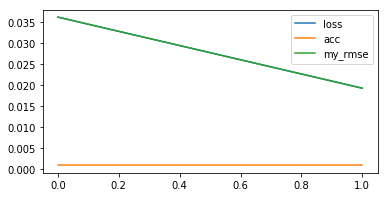

In [19]:
print('---'*40)
print('\tFITTING MODEL:')
print('---'*40,'\n')     
# start the timer
clock.tic('')

# Fit the model
history = model.fit_generator(train_generator,epochs=2,verbose=2,callbacks=callbacks,workers=3)

model_results = model.history.history

# print('Loss per epoch: ',loss_per_epoch)
# stop clock
clock.toc('')

def evaluate_model_plot_history(model, train_generator, test_generator):
    """Takes a keras model fit using fit_generator(), a train_generator and test generator.
    Extracts and plots Keras model.history's metrics."""
    # # EVALUATE MODEL PREDICTIONS FROM GENERATOR 
    model_metrics_train = model.evaluate_generator(train_generator)
    model_metrics_test = model.evaluate_generator(test_generator)
    print('\n')
    print('---'*40)
    print('\tEVALUATE MODEL:')
    print('---'*40)
    eval_gen_dict = {}
    eval_gen_dict['Training Data'] = dict(zip(model.metrics_names,model_metrics_train))
    eval_gen_dict['Test Data'] = dict(zip(model.metrics_names,model_metrics_test))

    display(pd.DataFrame(eval_gen_dict))

    # duration = print(clock._lap_duration_)
    model_results = model.history.history
    plt.figure(figsize=(6,3))
    for k,v in model_results.items():
        plt.plot(range(len(v)),v, label=k);
    plt.legend()

    
evaluate_model_plot_history(model, train_generator, test_generator)

### Adding Forecasting Quality Statistic - Thiel's U
- https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s03s04.html

|Thiel's U Value | Interpretation |
| --- | --- |
| <1 | Forecasting is better than guessing|
| 1 | Forecasting is about as good as guessing|
|>1 | Forecasting is worse than guessing|

$$U = \sqrt{\frac{ \sum_{t=1 }^{n-1}\left(\frac{\bar{Y}_{t+1} - Y_{t+1}}{Y_t}\right)^2}{\sum_{t=1 }^{n-1}\left(\frac{Y_{t+1} - Y_{t}}{Y_t}\right)^2}}$$
- ALSO EXAMINE RECOMMENDATIONS FROM THIS FORUM: https://stats.stackexchange.com/questions/351808/lstm-time-series-forecasting-accuracy

In [20]:
plt.style.use('seaborn-notebook')

print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];
def get_true_vs_model_preds_df(model, train_generator, test_generator,
                         train_data_index, test_data_index, x_window,
                         true_test_data = df_test['price'], true_train_data=df_train['price']):
    
    # GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
    test_predictions = arr2series( model.predict_generator(test_generator),
                                  test_data_index[x_window:], 'Predicted Test Price')
    
    train_predictions = arr2series( model.predict_generator(train_generator),
                                   train_data_index[x_window:], 'Predicted Train Price')

    # GET TRUE TEST AND TRAIN DATA AS SERIES
    true_test_price = pd.Series( true_test_data.iloc[x_window:],
                                index= test_data_index[x_window:], name='True Test Price')
    
    true_train_price = pd.Series(true_train_data.iloc[x_window:],
                                 index = train_data_index[x_window:], name='True Train Price')

    
    # COMBINE TRAINING DATA AND TESTING DATA INTO 2 DFS (with correct date axis)
    df_true_v_preds_train = pd.concat([true_train_price, train_predictions],axis=1)
    df_true_v_preds_test= pd.concat([true_test_price, test_predictions],axis=1)
    
    return df_true_v_preds_train, df_true_v_preds_test


    
    
def get_predictions_df_and_evaluate_model(model, train_generator, test_generator,
                                          train_data_index, test_data_index, x_window,
                                          true_test_data = df_test['price'], true_train_data=df_train['price'],
                                          inverse_scale =True, scaler=scaler_library['price'],
                                         return_separate=True, plot_results = True):
    
    # Call helper to get predictions and return as dataframes 
    df_true_v_preds_train, df_true_v_preds_test = get_true_vs_model_preds_df(\
        model, train_generator, test_generator,
        train_data_index, test_data_index, x_window,
        true_test_data, true_train_data)
    
    df_model_preds = pd.concat([df_true_v_preds_train, df_true_v_preds_test],axis=1)

    #     # GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
    #     test_predictions = arr2series( model.predict_generator(test_generator),
    #                                   test_data_index[x_window:], 'Predicted Test Price')

    #     train_predictions = arr2series( model.predict_generator(train_generator),
    #                                    train_data_index[x_window:], 'Predicted Train Price')

    #     # GET TRUE TEST AND TRAIN DATA AS SERIES
    #     true_test_price = pd.Series( true_test_data.iloc[x_window:],
    #                                 index= test_data_index[x_window:], name='True Test Price')

    #     true_train_price = pd.Series(true_train_data.iloc[x_window:],
    #                                  index = train_data_index[x_window:], name='True Train Price')


    #     # COMBINE TRAINING DATA AND TESTING DATA INTO 2 DFS (with correct date axis)
    #     df_true_v_preds_train = pd.concat([true_train_price, train_predictions],axis=1)
    #     df_true_v_preds_test = pd.concat([true_test_price, test_predictions],axis=1)

    
    #    # COMBINE TRUE/PRED TRAIN/TEST DATA
    #     df_model_preds_old = pd.concat([true_train_price,train_predictions,true_test_price,test_predictions], axis=1)

    
    ## CONVERT BACK TO DOLLARS AND PLOT
    if inverse_scale==True:
        df_model = pd.DataFrame()
        for col in df_model_preds.columns:
            df_model[col] = ji.inverse_transform_series(df_model_preds[col],scaler_library['price']) 
    else:
        df_model = df_model_preds

        
    if plot_results:
        # PLOTTING TRAINING + TRUE/PRED TEST DATA
        ji.plot_true_vs_preds_subplots(df_model['True Train Price'],df_model['True Test Price'], 
                                    df_model['Predicted Test Price'], subplots=True);


    # GET EVALUATION METRICS FROM PREDICTIONS
    true_test_series = df_model['True Test Price'].dropna()
    pred_test_series = df_model['Predicted Test Price'].dropna()
    
    # Get and display regression statistics
    results_tf = evaluate_regression(true_test_series, pred_test_series)
    display(results_tf)

    return df_model

------------------------------------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------------------------------------


In [21]:
## GET TRUE VS PRED DATA AND INVERSE TRANSFORM RESULTS BACK TO DOLLARS
df_true_v_preds_train, df_true_v_preds_test = \
get_true_vs_model_preds_df(model, train_generator, test_generator,
                           train_data_index, test_data_index, x_window,
                           true_test_data = df_test['price'], 
                           true_train_data=df_train['price'])

df_true_v_preds_train = df_true_v_preds_train.apply(
    lambda x: ji.inverse_transform_series(x, scaler_library['price']) )


df_true_v_preds_test = df_true_v_preds_test.apply(
    lambda x: ji.inverse_transform_series(x, scaler_library['price']) )


bs.display_side_by_side(df_true_v_preds_train.agg([min,max]),df_true_v_preds_test.agg([min,max]))

# Check timepoints of train vs test dataframes 
print(df_true_v_preds_train.index[[0,-1]], df_true_v_preds_test.index[[0,-1]])
print(df_true_v_preds_test.index.freq,df_true_v_preds_train.index.freq)

bs.display_side_by_side(df_true_v_preds_train.head(2), df_true_v_preds_test.head(2))

,True Train Price,Predicted Train Price
min,94.11,94.546837
max,116.59,116.621796
,True Test Price,Predicted Test Price
min,107.91,107.953300
max,117.19,117.400497


DatetimeIndex(['2017-12-01 15:30:00', '2019-04-19 15:30:00'], dtype='datetime64[ns]', name='date_time_index', freq=None) DatetimeIndex(['2019-04-26 15:30:00', '2019-06-21 15:30:00'], dtype='datetime64[ns]', name='date_time_index', freq=None)
<CustomBusinessHour: CBH=09:30-16:30> <CustomBusinessHour: CBH=09:30-16:30>


,True Train Price,Predicted Train Price
date_time_index,,
2017-12-01 15:30:00,108.03,108.081802
2017-12-04 09:30:00,109.02,108.113640
,True Test Price,Predicted Test Price
date_time_index,,
2019-04-26 15:30:00,115.98,115.908691
2019-04-29 09:30:00,116.20,116.032516


In [22]:
# Get and display regression statistics
results_tf_train = evaluate_regression(
    df_true_v_preds_train['Predicted Train Price'], df_true_v_preds_train['True Train Price']) #true_test_series, pred_test_series)

results_tf_test = evaluate_regression(
    df_true_v_preds_test['Predicted Test Price'], df_true_v_preds_test['True Test Price']) #true_test_series, pred_test_series)


bs.display_side_by_side(results_tf_train, results_tf_test)

,Value
Metric,
R_squared,0.991
Root Mean Squared Error,0.358
Thiel's U,1.100
,Value
Metric,
R_squared,0.964
Root Mean Squared Error,0.441
Thiel's U,0.850


,Value
Metric,
R_squared,0.964
Root Mean Squared Error,0.441
Thiel's U,1.068


,True Train Price,Predicted Train Price,True Test Price,Predicted Test Price
date_time_index,,,,
2017-12-01 15:30:00,108.03,108.081802,NaN,NaN
2017-12-04 09:30:00,109.02,108.113640,NaN,NaN


,True Train Price,Predicted Train Price,True Test Price,Predicted Test Price
date_time_index,,,,
2019-06-21 14:30:00,NaN,NaN,116.45,116.429565
2019-06-21 15:30:00,NaN,NaN,116.45,116.449562


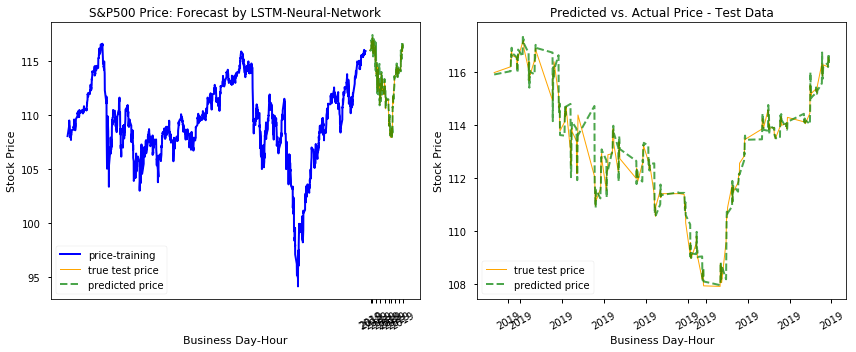

In [23]:
# Original All-in-One Function 
df_model1 = get_predictions_df_and_evaluate_model(model, train_generator, test_generator, train_data_index,
                                       test_data_index, x_window )
display(df_model1.head(2),df_model1.tail(2))

,index,U
# of Bins Shifted,,
-4,0,1.94249
-3,1,1.67671
-2,2,1.24557
-1,3,0.339867
0,4,1.06762
1,5,1.44077
2,6,1.7466
3,7,1.98554


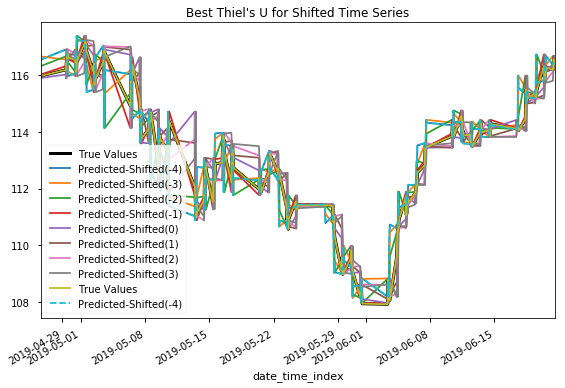

In [24]:
def compare_time_shifted_model(df_model,true_colname='True Test Price',pred_colname='Predicted Test Price',
                               shift_list=[-4,-3,-2,-1,0,1,2,3,4]):
    
    # GET EVALUATION METRICS FROM PREDICTIONS
    true_test_series = df_model[true_colname].dropna()
    pred_test_series = df_model[pred_colname].dropna()
    
    # Comparing Shifted Timebins
    res_df = compare_eval_metrics_for_shifts(true_test_series, pred_test_series,shift_list=np.arange(-4,4,1))
    res_U = compare_u_for_shifts(true_test_series,pred_test_series,shift_list=np.arange(-4,4,1),
                                 plot_all=True)#,plot_best=True)
    display(res_U)
    
    res_df = res_df.swaplevel(i=-2, j=-2, axis=0).unstack(-1)
    res_df = color_cols(res_df)#, subset=['R_squared'])
    display(res_df)
    return res_df;

compare_time_shifted_model(df_model1);

In [25]:
from ipywidgets import interact
functions = {'compare_time_shifted_model':compare_time_shifted_model,
    'compare_eval_metrics_for_shifts':compare_eval_metrics_for_shifts,
              'compare_u_for_shifts':compare_u_for_shifts}
interact(ji.ihelp, any_function = functions);

interactive(children=(Dropdown(description='any_function', options={'compare_time_shifted_model': <function co…

# Bookmark -fixing time series ticks

- https://matplotlib.org/examples/api/date_demo.html
- https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib ***
- https://python4astronomers.github.io/plotting/advanced.html#controlling-the-appearance-of-plots

### Notes: Using Matplotlib Tick Formatters

`fig.autofmt_xdate(which='both',rotation=30)`

- *Using `matplotlib.dates` and `AutoDateLocator`
```python
import matplotlib.dates as mdates
locator = mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(locator)
ax1.tick_params(axis='x',rotation=30)
# ax2.xaxis.set_major_locator(locator)
ax2.tick_params(axis='x',rotation=30)
fig
```

In [26]:
# fig_,ax1_,ax2_ = ji.plot_true_vs_preds_subplots(df_model1['True Train Price'],df_model1['True Test Price'], 
#                                 df_model1['Predicted Test Price'], subplots=True,figsize=(14,5));
# import matplotlib.dates as mdates
# locator = mdates.AutoDateLocator()
# ax1_.xaxis.set_major_locator(locator)
# ax1_.tick_params(axis='x',rotation=30)
# # ax2.xaxis.set_major_locator(locator)
# ax2_.tick_params(axis='x',rotation=30)

# plt.tight_layout()

In [27]:
ji.reload(ji)

Reloading...



<module 'functions_combined_BEST' from 'D:\\Users\\James\\Dropbox (Personal)\\CODING\\_FLATIRON\\Mod5_FinalProject\\dsc-5-capstone-project-online-ds-ft-021119\\functions_combined_BEST.py'>

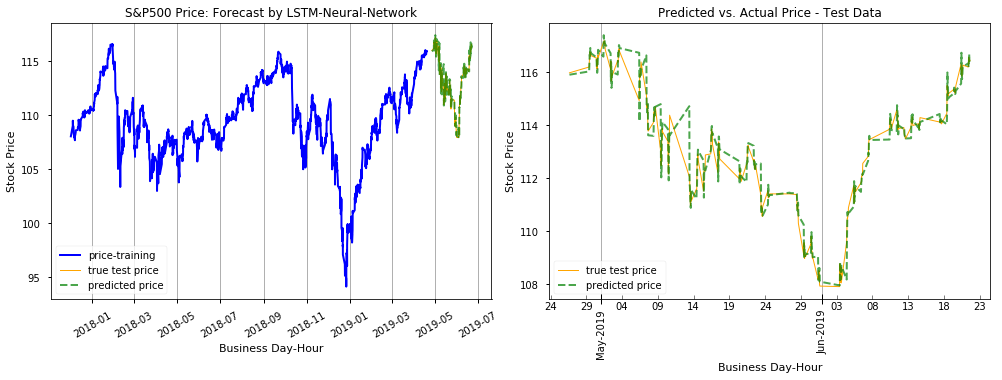

In [28]:
## REFORMAT AND IMPROVE PLOT VISUALS
fig,ax1,ax2 = ji.plot_true_vs_preds_subplots(
    df_model1['True Train Price'], df_model1['True Test Price'],
    df_model1['Predicted Test Price'], subplots=True,figsize=(14,5));


## MY BEST WORKING REFORNATTED TICKS
import matplotlib.dates as mdates
import datetime

# Instantiate Locators to be used
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()#interval=2)  # every month
quarters = mdates.MonthLocator(interval=3)#interval=2)  # every month

# Define various date formatting to be used
monthsFmt = mdates.DateFormatter('%Y-%b')
yearsFmt = mdates.DateFormatter('%Y') #'%Y')
yr_mo_day_fmt = mdates.DateFormatter('%Y-%m')
monthDayFmt = mdates.DateFormatter('%m-%d-%y')


## AX2 SET TICK LOCATIONS AND FORMATTING

# Set locators (since using for both location and formatter)
auto_major_loc = mdates.AutoDateLocator(minticks=5)
auto_minor_loc = mdates.AutoDateLocator(minticks=10)

# Set Major X Axis Ticks
ax1.xaxis.set_major_locator(auto_major_loc)
ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(auto_major_loc))

# Set Minor X Axis Ticks
ax1.xaxis.set_minor_locator(auto_minor_loc)
ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(auto_minor_loc))


ax1.tick_params(axis='x',which='both',rotation=30)
# ax1.tick_params(axis='x',which='major',pad=15)
ax1.grid(axis='x',which='major')




## AX2 SET TICK LOCATIONS AND FORMATTING

# Major X-Axis Ticks
ax2.xaxis.set_major_locator(months) #mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) #monthsFmt) #mdates.DateFormatter('%m-%Y')) #AutoDateFormatter(locator=locator))#yearsFmt)

# Minor X-Axis Ticks
ax2.xaxis.set_minor_locator(mdates.DayLocator(interval=5))#,interval=5))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%d')) #, fontDict={'weight':'bold'})

# Changing Tick spacing and rotation.
ax2.tick_params(axis='x',which='major',rotation=90, direction='inout',length=10, pad=5)
ax2.tick_params(axis='x',which='minor',length=4,pad=2, direction='in') #,horizontalalignment='right')#,ha='left')
ax2.grid(axis='x',which='major')

# fig.autofmt_xdate(which='both',rotation=30)

plt.show()
# fig

Prior attempts at editing ticks

```python
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x}"))
ax1.tick_params(axis='x',rotation=45) #get_majorticklabels(), rotation=70 )
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x}"))

ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate(rotation=30)

# StrMethod formatter
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)
# import 

ax2.xaxis.set_major_locator(mpl.ticker.NullLocator())

# fig
fig
```

### Make a plotly version of `plot_true_vs_preds_subplots`


In [29]:
import plotly.express as px
help(px.line())

TypeError: line() missing 1 required positional argument: 'data_frame'

In [ ]:
ji.ihelp(ji.plotly_time_series, show_help=True)

In [ ]:
def plotly_true_vs_preds_suplots(stock_df,
                                 WORK IN PROGRESS
                                 title=None,x_col='date_time_index', y_col='price',name='S&P500 Price'):
    import plotly
    import plotly.offline as py
    import plotly.tools as tls
    import plotly.graph_objs as go

    py.init_notebook_mode(connected=True)

    # %matplotlib inline

    # LEARNING HOW TO CUSTOMIZE SLIDER
    # ** https://plot.ly/python/range-slider/    
    fig = go.Figure()

    # Set title
    if title is None:
        title = "Time series with range slider and selectors"

    fig.update_layout(
        title_text=title
    )

    fig.add_trace(go.Scatter(x=stock_df[x_col], y=stock_df[y_col], name=name)) #df.Date, y=df['AAPL.Low'], name="AAPL Low",
    #                          line_color='dimgray'))
    # Add range slider
    fig.update_layout(
        xaxis=go.layout.XAxis(

            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                    dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                    dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                    dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),

        yaxis = go.layout.YAxis(
                    title=go.layout.yaxis.Title(
                        text = 'S&P500 Price',
                        font=dict(
                            # family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                    )
            )
    )
    fig.show()
    return fig

In [ ]:
## OLD FUNCTION (TOO MUCH IN ONE)
    # from functions_combined_BEST import get_true_vs_model_pred_df
    # df_model = get_true_vs_model_pred_df(model, n_input, test_generator,test_data_index,df_test,
    #                                      train_generator,train_data_index, df_train,
    #                                      scaler_library['price'],inverse_tf=True, plot=True)

    # # plot_true_vs_preds_subplots(df_model_preds['True Train Price'],df_model_preds['True Test Price'], df_model_preds['Predicted Test Price'], subplots=True)


## KERAS MODEL 2 - COMBINING STOCK PRICE AND INDICATORS

- [ ] already have data in df_train/test just take full dataframe as X (and just 'price' as y)

In [ ]:
stock_df.columns

In [ ]:
########## SET TRAINING AND TEST SET PARAMETERS: ############
num_test_days=45 # Number of days for test data 
num_train_days=365 # Number of days for training data - 5 days/week * 52 weeks
days_for_x_window = 1 # Number of days to 
############################################################

# Calculate number of rows to bin for x_windows
periods_per_day = get_day_window_size_from_freq(stock_df, custom_BH_freq()) # get the # of rows that == 1 day
x_window = periods_per_day * days_for_x_window 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')
    
###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
df_train, df_test = train_test_split_by_last_days(stock_df.drop('filled_timebin',axis=1), periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
scaler_library , df_train = make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = transform_cols_from_library(df_test,scaler_library)

## Display Preview of Scaled Dataset
# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test') )

In [ ]:
## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = x_window # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= df_train.shape[1] # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
# train_data = df_train.values #.reshape(-1,1)
# test_data = df_testvalues #.reshape(-1,1)
train_data_index =  df_train.index
test_data_index = df_test.index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=df_train.values, targets=df_train['price'].values,# reshape(-1,1),
                                      length=n_input, batch_size=batch_size )

test_generator = TimeseriesGenerator(data=df_test.values, targets=df_test['price'].values, #reshape(-1,1),
                                     length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape})')#' \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM

# Specifying input shape (size of samples, rank of samples?)
# input_shape =  (X_train_in.shape[1],1)
n_input = x_window # number of time bins in a day * number of days
n_features = df_train.shape[1]

input_shape=(n_input, n_features)


# Create model architecture
model2 = Sequential()


model2.add(LSTM(units=100, return_sequences=True, input_shape =input_shape))
model2.add(LSTM(units=50))
model.add(Dense(10))
model2.add(Dense(1))

model2.compile(loss=my_rmse, optimizer=optimizers.Nadam(), metrics=['acc'])#,my_rmse])#,metrics=['acc'])
display(model2.summary())

# start the timer
clock.tic('')

# Fit the model
# history = model2.fit_generator(X_train_in, y_train, epochs=2, verbose=0, validation_split=(0.25))
history = model2.fit_generator(train_generator,epochs=3,verbose=2,callbacks=callbacks,workers=3)

# stop clock
clock.toc('')
duration = print(clock._lap_duration_)

# from mod4functions_JMI import plot_keras_history
# plot_keras_history(history);


# # EVALUATE MODEL PREDICTIONS FROM GENERATOR 
model_metrics_train = model2.evaluate_generator(train_generator)
model_metrics_test = model2.evaluate_generator(test_generator)
print('\n')
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
eval_gen_dict = {}
eval_gen_dict['Training Data'] = dict(zip(model2.metrics_names,model_metrics_train))
eval_gen_dict['Test Data'] = dict(zip(model2.metrics_names,model_metrics_test))

display(pd.DataFrame(eval_gen_dict))

# duration = print(clock._lap_duration_)
plt.figure(figsize=(6,3))
for k,v in model_results.items():
    plt.plot(range(len(v)),v, label=k);
plt.legend()

In [ ]:
ji.reload(ji)
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];

# GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
test_predictions = ji.arr2series(model2.predict_generator(test_generator), test_data_index[x_window:], 'Predicted Test Price')
train_predictions = ji.arr2series(model2.predict_generator(train_generator), train_data_index[x_window:], 'Predicted Train Price')

# GET TRUE TEST AND TRAIN DATA AS SERIES
true_test_price = pd.Series( df_test['price'].iloc[n_input:], index= test_data_index[x_window:], name='True Test Price')
true_train_price = pd.Series(df_train['price'].iloc[n_input:],index = train_data_index[x_window:], name='True Train Price')

# COMBINE TRUE/PRED TRAIN/TEST DATA
df_model_preds = pd.concat([true_train_price,train_predictions,true_test_price,test_predictions], axis=1)

## CONVERT BACK TO DOLLARS AND PLOT
df_model_preds_tf = pd.DataFrame()
for col in df_model_preds.columns:
    df_model_preds_tf[col] = inverse_transform_series(df_model_preds[col],scaler_library['price']) 

In [ ]:
    
# PLOTTING TRAINING + TRUE/PRED TEST DATA
ji.plot_true_vs_preds_subplots(df_model_preds_tf['True Train Price'],df_model_preds_tf['True Test Price'], 
                            df_model_preds_tf['Predicted Test Price'], subplots=True);    


# GET EVALUATION METRICS FROM PREDICTIONS
true_test_series = df_model_preds_tf['True Test Price'].dropna()
pred_test_series = df_model_preds_tf['Predicted Test Price'].dropna()
results_tf = evaluate_regression(true_test_series, pred_test_series)
display(results_tf)

In [ ]:
# COMPARE SHIFTED VALUES FOR THIEL's U
res_u = compare_u_for_shifts(true_test_price,test_predictions,shift_list=np.arange(-4,4,1), plot_all=False,plot_best=True)
display(res_u)
# compare_u_for_shifts(true_test_price,test_predictions,shift_list=np.arange(-4,4,1), plot_all=False,plot_best=True)
res_df = compare_eval_metrics_for_shifts(true_test_price, test_predictions,shift_list=np.arange(-4,4,1))

res_df_ = res_df.swaplevel(i=-2, j=-2, axis=0).unstack(-1)
# res_df_.index
display(res_df_)

In [ ]:
save_model_and_weights(model2,'stock_plus_indicators_U39_shift-1')


___

___

## Blog Post Code
- NEW BLOG POST - LSTM TIME SERIES FORECASTING
    - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [ ]:
stop

In [ ]:
from keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, MaxPooling1D
model3 = Sequential()
# input_shape =  (X_train_in.shape[0],X_train_in.shape[1],1)
input_shape=(n_input, n_features,1)

model3.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=input_shape)) #(None, n_steps, n_features)))
model3.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss=my_rmse)
model3.summary()
# fit model

clock.tic('')
history3 = model3.fit_generator( train_generator,epochs=3,verbose=2,callbacks=callbacks,workers=3)

clock.toc('')
evaluate_model_plot_history(model3, train_generator, test_generator)

In [ ]:
#(X_train_in, y_train, epochs=500, verbose=0)
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))

# yhat = model.predict(X_test_in, verbose=0)
# print(yhat)

# predictions = pd.Series(predictions.ravel(),name='predicted_price',index=index_test)
# true_price =  pd.Series(y_test,name='true_price',index=index_test)

# df_predictions = pd.concat([predictions,true_price],axis=1)#, columns=['predicted_price','true_price'], index=index_test)
# display(df_predictions.head())

# # Plot outcome
# mpl.rcParams['figure.figsize']=(12,4)
# plt.plot(df_train_bins['price_labels'])
# plt.plot(df_predictions)


In [ ]:
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];

# GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
test_predictions = arr2series(model3.predict_generator(test_generator), test_data_index[x_window:], 'Predicted Test Price')
train_predictions = arr2series(model3.predict_generator(train_generator), train_data_index[x_window:], 'Predicted Train Price')

# GET TRUE TEST AND TRAIN DATA AS SERIES
true_test_price = pd.Series( df_test['price'].iloc[n_input:], index= test_data_index[x_window:], name='True Test Price')
true_train_price = pd.Series(df_train['price'].iloc[n_input:],index = train_data_index[x_window:], name='True Train Price')

# COMBINE TRUE/PRED TRAIN/TEST DATA
df_model_preds = pd.concat([true_train_price,train_predictions,true_test_price,test_predictions], axis=1)

## CONVERT BACK TO DOLLARS AND PLOT
df_model_preds_tf = pd.DataFrame()
for col in df_model_preds.columns:
    df_model_preds_tf[col] = inverse_transform_series(df_model_preds[col],scaler_library['price']) 

    
# PLOTTING TRAINING + TRUE/PRED TEST DATA
plot_true_vs_preds_subplots(df_model_preds_tf['True Train Price'],df_model_preds_tf['True Test Price'], 
                            df_model_preds_tf['Predicted Test Price'], subplots=True);    


# GET EVALUATION METRICS FROM PREDICTIONS
true_test_series = df_model_preds_tf['True Test Price'].dropna()
pred_test_series = df_model_preds_tf['Predicted Test Price'].dropna()
results_tf = evaluate_regression(true_test_series, pred_test_series)
display(results_tf)



In [ ]:
STOP
# PREVIEW DATA CONTENTS
# display(df_train_bins.head())
df_train_bins['price_labels'].plot()
df_test_bins['price_labels'].plot()


print('Train Index: ',df_train_bins.index[[0,-1]])
print('Test Index: ',df_test_bins.index[[0,-1]])

In [ ]:
#importing required libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

time_index =stock_df.index.values
stock_df['date'] = time_index# .astype('str')

#creating dataframe
data = stock_df[['date','price']]

new_data = pd.DataFrame(index=range(0,len(stock_df)),columns=['date', 'price'])
display(new_data.head()), display(data.head())

for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['price'][i] = data['price'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)


In [ ]:
new_data

In [ ]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['price'])
plt.plot(valid[['price','Predictions']])
plt.show()

# ✔ BOOKMARK - RESUMING ANALYSIS WITH NEW FUNCTIONS
- Check Evernote log: https://www.evernote.com/l/AApgV1EaL9lEYpujWnwHq62W9QyEKkH4hwA/


## Load In NLP Twitter Model

In [ ]:
STOP

In [ ]:
# from functions_combined_BEST import *
import pandas as pd

In [ ]:
pd.set_option('display.max_columns',None)
df_tokenize = pd.read_csv('twitter_df_tokenized_with_price.csv',index_col=0, parse_dates=True)
df_tokenize.head()


In [ ]:
# Word2Vec 
filename = 'word2vec_model_twitter.pickle'
import pickle
with open(filename,'rb') as f:
    word_model,vector_size,embedding_matrix = pickle.load(f)

In [ ]:
# Loading in twitter LSTM model
from keras.models import model_from_json
with open ('bestNLPmodel_best_stock_increase.json','r') as f:
    twitter_model = model_from_json(f.read())
    twitter_model.load_weights('bestNLPmodel_best_stock_increase.h5')
    
for i, model_layer in enumerate(twitter_model.layers):
    twitter_model.get_layer(index=i).trainable=False
    print(model_layer,twitter_model.get_layer(index=i).trainable)
    
    
twitter_model.summary()

### LOADING IN TWITTER DATA TO GROUP

In [ ]:
ihelp(ji.load_raw_twitter_file), ihelp(ji.full_twitter_df_processing)

In [ ]:
import pandas as pd
import functions_combined_BEST as ji

In [ ]:
ji.ihelp(ji.full_twitter_df_processing)

In [ ]:
### LOAD IN AND PROCESS TWITTER DATA
ji.reload(ji)
twitter_df= ji.load_raw_twitter_file()
twitter_df = ji.full_twitter_df_processing(twitter_df,cleaned_tweet_col='clean_content')

# cols_to_drop = ['has_RT','starts_RT','content_starts_RT','content_hashtags','content_mentions']
# twitter_df.drop(cols_to_drop,axis=1,inplace=True)

display(twitter_df.head())
print(twitter_df.index[[0,-1]],twitter_df.index.freq)

In [ ]:
# # ofst = pd.offsets.CustomBusinessHour(start='09:30',end='16:30',)
# # ofstBH = pd.offsets.BusinessHour(n=1, start='09:30',end='16:30')
# # ts = pd.to_datetime('2019-07-11 14:23')
# # ofst.rollback(ts)
# num_offset=1
# twitter_df['date']
# freq=pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30')
# ofst = pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30') #freq=ji.custom_BH_freq()
# ofst.rollback(twitter_df['date'].iloc[0])

In [ ]:

def make_time_index_intervals(twitter_df,col ='date', start=None,end=None, freq='CBH',num_offset=1):
    """Takes a df, rounds first timestamp down to nearest hour, last timestamp rounded up to hour.
    Creates 30 minute intervals based that encompass all data."""
    import pandas as pd
    
    
    if freq=='CBH':
        freq=pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30')
        ofst = pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30') #freq=ji.custom_BH_freq()
        ofst_early = pd.offsets.CustomBusinessHour(n=-num_offset,start='09:30',end='16:30') #freq=ji.custom_BH_freq()
    if freq=='T':
        ofst = pd.offsets.Minute(n=num_offset)
        ofst_early = pd.offsets.Minute(n=-num_offset)
        
    if freq=='H':
        ofst = pd.offsets.Hour(n=num_offset)
        ofst_early=pd.offsets.Hour(n=-num_offset)

#     print(ofst)
    if start is None:
        # Get timebin before the first timestamp that starts     
        start_idx = ofst.rollback(twitter_df[col].iloc[0].floor('H'))
    else:
        start_idx = pd.to_datetime(start)

    if end is None:
        # Get timbin after last timestamp that starts 30m into the hour.
        end_idx= ofst.rollforward(twitter_df[col].iloc[-1].ceil('H'))
    else:
        end_idx = pd.to_datetime(end)


    # Make time bins using the above start and end points 
    print(f'start:{start_idx}, end:{end_idx}, freq:{freq}')
    time_range = pd.date_range(start =start_idx, end = end_idx, freq=freq)#.to_period()
    time_intervals = pd.interval_range(start=start_idx, end=end_idx,freq=freq,name='CBH_intervals',closed='left')
    
    return time_intervals


def int_to_ts(int_list, as_datetime=False, as_str=True):
    """Helper function: accepts one Panda's interval and returns the left and right ends as either strings or Timestamps."""
    import pandas as pd
    if as_datetime & as_str:
        raise Exception('Only one of `as_datetime`, or `as_str` can be True.')
    
    left_edges =[]
    right_edges= []
    
    for interval in int_list:
        
        int_str = interval.__str__()[1:-1]
        output = int_str.split(',')
        left_edges.append(output)
#         right_edges.append(right)
        
    
    if as_str:
        return left_edges#, right_edges
    
    elif as_datetime:
        left = pd.to_datetime(left)
        right = pd.to_datetime(right)
        return left,right
    

def bin_df_by_date_intervals(test_df,time_intervals,column='date',roll_freq='CBH'):
    """Uses pd.cut with half_hour_intervals on specified column.
    Creates a dictionary/map of integer bin codes. 
    Adds column"int_bins" with int codes.
    Adds column "left_edge" as datetime object representing the beginning of the time interval. 
    Returns the updated test_df and a list of bin_codes."""
    import pandas as pd
    
    if roll_freq=='CBH':
        ofst = pd.offsets.CustomBusinessHour(start='09:30',end='16:30')
        
        # Make a rolled_date column to use for bining
        test_df['rolled_date'] = test_df[column].apply(lambda x: ofst.rollforward(x))
    
    # Cut The Date column into interval bins, 
    cut_date = pd.cut(test_df['rolled_date'], bins=time_intervals)#,labels=list(range(len(half_hour_intervals))), retbins=True)
    test_df['int_times'] = cut_date    
    print(test_df.isna().sum())
    test_df.dropna(inplace=True)
    # convert to str to be used as group names/codes
    unique_bins = cut_date.astype('str').unique()
    num_code = list(range(len(unique_bins)))
    
    # Dictioanry of number codes to be used for interval groups
    bin_codes = dict(zip(num_code,unique_bins))#.astype('str')

    
    # Mapper dictionary to convert intervals into number codes
    bin_codes_mapper = {v:k for k,v in bin_codes.items()}

    # Add column to the dataframe, then map integer code onto it
    test_df['int_bins'] = test_df['int_times'].astype('str').map(bin_codes_mapper)
    
    # Get the left edge of the bins to use later as index (after grouped)
    edges_out =int_to_ts(test_df['int_bins'])#.apply(lambda x: int_to_ts(x))    
    test_df['bin_edges'] = edges_out#pd.to_datetime(edges_out)

    # bin codes to labels 
    bin_codes = [(k,v) for k,v in bin_codes.items()]
    
    return test_df, bin_codes



def concatenate_group_data(group_df_or_series):
    """Accepts a series or dataframe from a groupby.get_group() loop.
    Adds TweetFreq column for # of rows concatenate. If input is series, 
    TweetFreq=1 and series is returned."""
    
    import pandas as pd
    from pandas.api import types as tp
    
    if isinstance(group_df_or_series, pd.Series):
        
        group_data = group_df_or_series
        
#         group_data.index = group_df_or_series.index
        group_data['TweetFreq'] = 1

        return group_data
    
    # if the group is a dataframe:
    elif isinstance(group_df_or_series, pd.DataFrame):
        
        df = group_df_or_series
        
        # create an output series to collect combined data
        group_data = pd.Series(index=df.columns)
        group_data['TweetFreq'] = df.shape[0]
        

        for col in df.columns:
            
            combined=[]
            col_data = []
            
            col_data = df[col]
            combined=col_data.values
            
            group_data[col] = combined

    return group_data


def collapse_df_by_group_index_col(twitter_df,group_index_col='int_bins', new_col_order=None):
    """Loops through the group_indices provided to concatenate each group into
    a single row and combine into one dataframe with the ______ as the index"""

    import pandas as pd


    # Create a Panel to temporarily hold the group series and dataframes
    # group_dict_to_df = {}
    # create a dataframe with same columns as twitter_df, and index=group ids from twitter_groups
        
    group_indices = twitter_df.groupby(group_index_col).groups
    group_indices = [(k,v) for k,v in group_indices.items()]
    group_df_index = [x[0] for x in group_indices]
    
    
    # Create empty shell of twitter_grouped dataframe
    twitter_grouped = pd.DataFrame(columns=twitter_df.columns, index=group_df_index)
    twitter_grouped['TweetFreq'] =0

    
    # Loop through each group_indices
    for (idx,group_members) in group_indices:

        group_df = twitter_df.loc[group_members]

        # Call on concatenate_group_data to handle the merging of rows
        combined_series = concatenate_group_data(group_df)

#         twitter_grouped.loc[idx,:] = combined_series
        twitter_grouped.loc[idx] = combined_series#.values

    # Update Column order, if requested, otherwise return twitter_grouped
    if new_col_order==None:
        return twitter_grouped
    else:
        df_out = twitter_grouped[new_col_order].copy()
        df_out.index = group_df_index#twitter_grouped.index
        return df_out

In [ ]:
twitter_df.head()

In [ ]:
# ofst.rollback(twitter_df.index[0].)
def test_ofst_rolling(i=0):
    """Tool to help visualize the effect of offsets when deterimining a time interval range."""
    ofst = pd.offsets.CustomBusinessHour(start='09:30',end='16:30',)
    print('TS: \t\t',twitter_df.index[i])
    print('TS.floor(H): \t',twitter_df.index[i].floor('H'))
    print('TS rollback: \t\t',ofst.rollback(twitter_df.index[i]))
    print('TS rollforward: \t',ofst.rollforward(twitter_df.index[i]))
    print('\n')
    print('TS floor(H)-rollback: \t',ofst.rollback(twitter_df.index[i].floor('H')))
    print('TS floor(H)-rollforward: ',ofst.rollforward(twitter_df.index[i].floor('H')))

test_ofst_rolling(0)

In [ ]:
# ## ORIGINAL CODE FRAMEWORK
# half_hour_intervals = make_half_hour_range(twitter_df)

# twitter_df, bin_codes = bin_df_by_date_intervals(twitter_df, half_hour_intervals)

# ## NOT A FUNCTION:
# group_indices = twitter_df.groupby('int_bins').groups
# group_indices = [(k,v) for k,v in group_indices.items()]

# twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices)#, new_col_order=new_col_order)
# # twitter_grouped.head(2)

# twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
# twitter_grouped.set_index('time_bin',drop=True, inplace=True)
# twitter_grouped.head(2)

In [ ]:
pd.set_option('display.max_columns',None)
# display(twitter_df.head(2), twitter_df.tail(2))

In [ ]:
## NEW CODE FRAMEWORK
time_intervals = make_time_index_intervals(twitter_df)

twitter_df, bin_codes = bin_df_by_date_intervals(twitter_df,time_intervals)


twitter_grouped = collapse_df_by_group_index_col(twitter_df, group_index_col='int_bins')
display(twitter_grouped.head())
# twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
# twitter_grouped.set_index('time_bin',drop=True, inplace=True)
# twitter_grouped.head(2)

# CBH = custom_BH_freq()

# grouped_resampled = twitter_grouped.loc['02-21-2017':].asfreq(CBH)
# stock_resampled = stock_df.loc['02-21-2017':].asfreq(CBH)
# # grouped_resampled = grouped_resampled.loc[stock_df.index[0]:stock_df.index[-1]]

# grouped_resampled['join_date'] = grouped_resampled.index
# stock_df['join_date'] =  stock_df.index

# print(grouped_resampled.join_date)
# print(stock_df.join_date)

# # print(len(grouped_resampled),len(twitter_grouped))

# # compare_indices = [True for i in grouped_resampled.index if i in stock_df.index]
# # np.sum(compare_indices==False)

In [ ]:
# #***#
# new_col_order = ['date','left_edge','content_raw','content_stopped','tokens_stopped',
#                   'retweet_count','favorite_count','case_ratio','sentiment_scores','compound_score','int_bins']
# for col in new_col_order:
#     print(col,'\t',col in twitter_df.columns)

In [ ]:
# twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices)#, new_col_order=new_col_order)
# twitter_grouped.head(2)

twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
twitter_grouped.set_index('time_bin',drop=True, inplace=True)
twitter_grouped.head(2)

## ADDING TWITTER EXTRACTION TO MODEL-PREPARATION

In [ ]:
# NEED TO HAVE DATA COMBINED ALREADY (THO DONT WANT TO SCALE??)


In [ ]:
########## SET TRAINING AND TEST SET PARAMETERS: ############
num_test_days=45 # Number of days for test data 
num_train_days=365 # Number of days for training data - 5 days/week * 52 weeks
days_for_x_window = 5 # Number of days to 
############################################################

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(stock_df, ji.custom_BH_freq()) # get the # of rows that == 1 day
x_window = periods_per_day * days_for_x_window 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')
    
###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
df_train, df_test = ji.train_test_split_by_last_days(stock_df, periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
scaler_library , df_train = ji.make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = ji.transform_cols_from_library(df_test,scaler_library)

## Display Preview of Scaled Dataset
# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test') )

## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = x_window # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= 1 # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
train_data = df_train['price'].values.reshape(-1,1)
test_data = df_test['price'].values.reshape(-1,1)
train_data_index =  df_train['price'].index
test_data_index = df_test['price'].index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=train_data, targets=train_data,length=n_input, batch_size=batch_size )
test_generator = TimeseriesGenerator(data=test_data, targets=test_data,length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape}) \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

# Twitter Processing 

- NLP Pre-Processing 
    - stopword removal and regexp tokenization
    - extraction and removal of hashtags, @'s and urls' using regex
- Word Frequency Disributions and Bigrams
    - Word Frequencies - tweet, #'s
    - Bigrams - tweets
    - WordClouds - tweet, #'s, @'s

- Upper to lower case ratio

### NLP Pre-Processing

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# folder_path = '/content/drive/My Drive/Colab Notebooks/Mod 5 Project/'

# file = folder_path +'data/trump_tweets_01202017_06202019.csv'
# df = pd.read_csv(file, encoding='utf-8')
# df.rename(axis=1,mapper={'text':'content','created_at':'date'},inplace=True)
# df['date']=pd.to_datetime(df['date'])

# display(df.head())
# print(' First tweet:',df.date.min(),'\n','Last tweet:',df.date.max())
# print('\nRange of Dates: ',df.date.max() - df.date.min())

In [ ]:
# Generate Stopwords List from nltk + punctuation + custom list
from nltk import regexp_tokenize

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

    if tokenize==True:
        from nltk import regexp_tokenize
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

# # Remove stopwords using function apply_stopwords)
# df['text_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))

# # Tokenize using regexp_tokenize from nltk
# df['tokens_stopped'] = df['content'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# Save 'hashtags' column containing all hastags
import re
df['content_raw'] = df['content'].copy()

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df['has_RT']=df['content_raw'].str.contains('RT')
df['starts_RT']=df['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df['content_min_clean'] =  df[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# # Issue of empty entries for hashtags interfering with joining.
# def empty_lists_to_strings(x):
#     """Takes a series and replaces any empty lists with an empty string instead."""
#     if len(x)==0:
#         return ' '
#     else:
#         return ' '.join(x) #' '.join(tokens)
    
    
# # Apply empty_lists_to_strings to hashtags
# df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

# # Apply empty_lists_to_strings to mentions
# df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))

### Word Frequency Distributions & Bigrams

In [ ]:
twitter_df.head()

In [ ]:
# FOR TWEET WORD CONTENT
column = 'content_stopped'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)
    

In [ ]:
# MAKE BIGRAMS
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
import mod4functions_JMI as jmi

bigram_measures =BigramAssocMeasures()

tweet_finder = BigramCollocationFinder.from_words(TEXT['tokens'])
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

df_1 = quick_table(tweets_scored[:25], col_names =['Bigram','Frequency'],
                       caption='Tweet Bigrams', display_df=False)
df_1['Bigram'] = df_1['Bigram'].apply(lambda x: ' '.join(x))
df_1.set_index('Bigram',inplace=True)
df_1.columms=['Frequency']
df_1

In [ ]:
# CREATING HASHTAG DICT
column = 'hashtag_strings'
tag_pattern ='(#\w*)'
tags_combined = df[column]
tags_combined = ' '.join(tags_combined)
tags_tokenized = regexp_tokenize(tags_combined, tag_pattern)

TAGS = dict()
TAGS['tokens'] = tags_tokenized
TAGS['text'] = tags_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tags = FreqDist(TAGS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tags.plot(25)

In [ ]:
# CREATING METNION DICT
column = 'mention_strings'
at_pattern ='(@\w*)'
ats_combined = df[column]
ats_combined = ' '.join(ats_combined)
ats_tokenized = regexp_tokenize(ats_combined, at_pattern)

ATS = dict()
ATS['tokens'] = ats_tokenized
ATS['text'] = ats_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_ats = FreqDist(ATS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_ats.plot(25)

### Word Clouds

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import mask images for shaped wordclouds
from PIL import Image
import numpy as np

mask_folder_path = '/content/drive/My Drive/Images/fig_masks/'
## Twitter Bird masks
mask_f_right = np.array(Image.open(mask_folder_path+'twitter1.png'))
mask_f_left = np.array(Image.open(mask_folder_path+'twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-03.jpg'))

In [ ]:
# Define wordcloud plotting function
def plot_fit_cloud(troll_cloud,label1='Most Common Words',figsize=(4,4)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ax.imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax.axis("off")
    ax.set_title(label1, fontsize=20)
    return fig, ax

#### Creating multiple kinds of wordclouds
- tweet words, tweet bigrams
- #'s, @'s


In [ ]:
# Instantiazting wordcloud and defining properties
from wordcloud import WordCloud

max_font_size=100
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
# collocations=False

wordcloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=False,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)

wordcloud.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud)

In [ ]:
# Plotting bigram wordcloud
wordcloud_bigram= WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                            background_color=background_color, collocations=True,normalize_plurals=False,
                            stopwords=[], mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)
wordcloud_bigram.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud_bigram, 'Most Common Bigrams')

In [ ]:
# Combine and Tokenize hashtags
tags = df['hashtag_strings']
tags = ' '.join(tags)
tags_tokens = regexp_tokenize(tags,'(#\w*)')


# WordClouds for Hashtags
max_font_size=300
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'


tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


tag_cloud.generate(' '.join(tags_tokens))
plot_fit_cloud(tag_cloud,'Most Common Hashtags',figsize=(5,5))

In [ ]:
# Combine and Tokenize hashtags
mentions = df['mention_strings']
mentions = ' '.join(mentions)
mentions_tokens = regexp_tokenize(mentions,'(@\w*)')


# WordClouds for Mentions
max_font_size=300
width=500
height=500
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'

mentions_cloud = WordCloud(
    
    max_font_size=max_font_size, width=width, height=height,
    
    max_words=max_words, background_color=background_color,
    
    stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
    
    mask=mask_at, contour_color='black', contour_width=2
)#, include_numbers=True)


mentions_cloud.generate(' '.join(mentions_tokens))

plot_fit_cloud(mentions_cloud,"Most Common @'s",figsize=(3,3))

### Additional Tweet Processing and Feature Extraction

In [ ]:
def case_ratio(msg):
    """Accepts a twitter message (or used with .apply(lambda x:)).
    Returns the ratio of capitalized characters out of the total number of characters."""
    import numpy as np
    msg_length = len(msg)
    test_upper = [1 for x in msg if x.isupper()]
    test_lower = [1 for x in msg if x.islower()]
    test_ratio = np.round(sum(test_upper)/msg_length,5)
    return test_ratio

# df['case_ratio'] = df['content'].apply(lambda x: case_ratio(x))
# df.sort_values('case_ratio',ascending=False).head()

### Sentiment Analysis

In [ ]:
## NEW 07/11/19 - function for all sentiment analysis

def full_sentiment_analysis(twitter_df, source_column='content_min_clean',separate_cols=True):#, plot_results=True):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    source_column='content_min_clean'
    twitter_df['sentiment_scores'] = twitter_df[source_column].apply(lambda x: sid.polarity_scores(x))
    twitter_df['compound_score'] = twitter_df['sentiment_scores'].apply(lambda dict: dict['compound'])
    twitter_df['sentiment_class'] = twitter_df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')
    
    
    # Separate result dictionary into columns  (optional)
    if separate_cols==True:
        # Separate Scores into separate columns in df
        twitter_df_out = get_group_sentiment_scores(twitter_df)
    else:
        twitter_df_out = twitter_df
        
    
#     # plot results (optional)
#     if plot_results==True:
        
#         print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
#         # Normalized % of troll sentiment classes
#         plot_sent_class = twitter_df_out['sentiment_class'].value_counts()
#         plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
#         print('\tNormalized Troll Classes:\n',plot_sent_class_norm)


#         with plt.style.context('seaborn-notebook'):
#             boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
#             boxplot.set_xticklabels(['Negative','Neutral','Positive']);
#             boxplot.set_title('Sentiment Scores By Word Type')
#             boxplot.set_ylabel('Sentiment Score')
    
    return twitter_df_out
        
        

# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores'):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)
    return df

In [ ]:
# import bs_ds as bs
# import mod4functions_JMI as jmi
# # from bs_ds.imports import *

# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

# source_column='content_min_clean'
# df['sentiment_scores'] = df[source_column].apply(lambda x: sid.polarity_scores(x))
# df['compound_score'] = df['sentiment_scores'].apply(lambda dict: dict['compound'])
# df['sentiment_class'] = df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')


# # Separate Scores into separate columns in df
# df = get_group_sentiment_scores(df)

In [ ]:

print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_sent_class = df['sentiment_class'].value_counts()
plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
print('\tNormalized Troll Classes:\n',plot_sent_class_norm)


with plt.style.context('seaborn-notebook'):
    boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
    boxplot.set_xticklabels(['Negative','Neutral','Positive']);
    boxplot.set_title('Sentiment Scores By Word Type')
    boxplot.set_ylabel('Sentiment Score')

# COMBINING TWITTER AMD STOCK MARKET DATAFRAMES

In [ ]:
try: twitter_df
except NameError: twitter_df = None
    
if twitter_df is None:
    print('loading twitter_df')
    twitter_df = pd.read_csv('data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
    twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

    # Fill in missing values before merging with stock data
    twitter_df.fillna('', inplace=True)
    twitter_df.sort_index(ascending=True, inplace=True)

    # Check header and daterange of index
    display(twitter_df.head(2))
    twitter_df.index[[0,-1]]
else:
    print('twitter_df already exists.')

### WRITING FUNCTION TO BIN TWEETS BY HOUR PRE-NLP (and add Freq column)

In [ ]:
# twitter_df = pd.read_csv(folder_path+'data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
# twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

# # Fill in missing values before merging with stock data
# twitter_df.fillna('', inplace=True)
# twitter_df.sort_index(ascending=True, inplace=True)

# # Check header and daterange of index
# display(twitter_df.head(2))
# twitter_df.index[[0,-1]]